In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [112]:
data = pd.read_csv('USA_cars_datasets.csv')

In [113]:
data

,no,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


In [114]:
# Mengubah data menjadi array
X = data[['price','mileage']].values

In [115]:
X

array([[  6300., 274117.],
       [  2899., 190552.],
       [  5350.,  39590.],
       ...,
       [  9200.,  31594.],
       [  9200.,  32557.],
       [  9200.,  31371.]])

In [116]:
# Normalisasi pada data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [117]:
wcss=[]

In [118]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

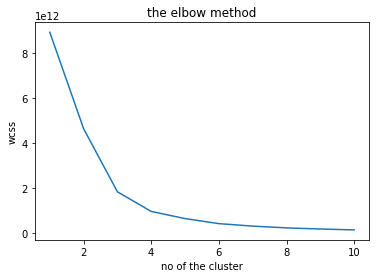

In [119]:
plt.plot(range(1,11),wcss)
plt.title("the elbow method")
plt.xlabel("no of the cluster")
plt.ylabel("wcss")
plt.show()

In [120]:
kmeanmodel = KMeans(n_clusters=3,init="k-means++",random_state=0)
y_kmeans=kmeanmodel.fit_predict(x)

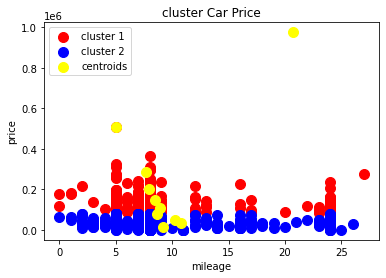

In [121]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=100, c="red", label="cluster 1")
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s=100, c="blue", label="cluster 2")
#plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s=100, c="green", label="cluster 3")
#plt.scatter(x[y_kmeans==3,0], x[y_kmeans==3,1], s=100, c="cyan", label="cluster 4")
#plt.scatter(x[y_kmeans==4,0], x[y_kmeans==4,1], s=100, c="magenta", label="cluster 5")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="yellow",label="centroids")
plt.title("cluster Car Price")
plt.xlabel("mileage")
plt.ylabel("price")
plt.legend()
plt.show()

In [122]:
# Evaluation
#labels = kmeans.labels_
from sklearn.metrics import davies_bouldin_score
w=davies_bouldin_score(X, y_kmeans)
print("Score davies bouldin ")
print(w)

Score davies bouldin 
0.40798711466948373
